### Set Dataset Path

In [1]:
import os
#Set your own data files path here
path = r"C:\Users\SAI\Desktop\00_PROJECT\project_done\project_done-20200420T133725Z-001\project_done"
os.chdir(path)

### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import datetime

### Import Dataset

In [3]:
pima = pd.read_csv("non_accident2014.csv")

### Splitting the Data for Training and Testing

In [35]:
#Import train_test_split function
from sklearn.model_selection import train_test_split
feature_cols = ['Longitude','Latitude','Day_of_Week','Hour','Day_of_year','Local_Authority_(District)','1st_Road_Class',
       '1st_Road_Number','Speed_limit','Accident_Severity','Number_of_Vehicles','Number_of_Casualties']
    
    
X=pima[feature_cols] #Features

y=pima['Accident']  #Labels


#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) # 70% training and 30% test
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(9600, 12) (9600,)
(6400, 12) (6400,)


### Impelementing Random Forest Model

In [37]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=150)

#Train the model using the training sets
model=clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(y_pred[0:15])
print(y_test[0:15])

[0 0 0 0 0 0 0 1 0 0 0 1 1 0 0]
7567     0
12121    0
15793    0
10453    0
12115    0
99       0
4254     0
352      1
69       0
10373    0
8706     0
5148     1
3184     1
6405     0
14410    0
Name: Accident, dtype: int64


##### Calculating Accuracy, Precision & Recall

Score: 0.99984375


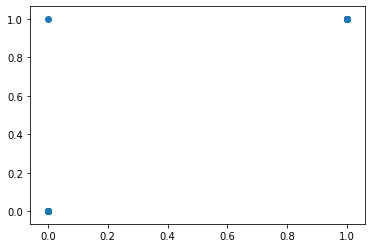

In [19]:
plt.scatter(y_test,y_pred)


print("Score:", model.score(X_test, y_test)) 


In [21]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.99984375
Precision: 0.999395039322444
Recall: 1.0
F1 Score: 0.999697428139183


In [26]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

results = confusion_matrix(y_test, y_pred) 

print ("Confusion Matrix :")
print(results) 
print ("Accuracy Score :",accuracy_score(y_test, y_pred)) 
print ("Report :") 
print (classification_report(y_test, y_pred)) 


Confusion Matrix :
[[4747    1]
 [   0 1652]]
Accuracy Score : 0.99984375
Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4748
           1       1.00      1.00      1.00      1652

    accuracy                           1.00      6400
   macro avg       1.00      1.00      1.00      6400
weighted avg       1.00      1.00      1.00      6400



In [27]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[4747,    1],
       [   0, 1652]], dtype=int64)

TP | FP

FN | TN

### Finding Important Features

In [29]:
feature_imp = pd.Series(clf.feature_importances_,index=feature_cols).sort_values(ascending=False)
feature_imp

Day_of_year    0.646891
Hour           0.170433
Day_of_Week    0.135174
Latitude       0.019875
Longitude      0.016309
Speed_limit    0.011317
dtype: float64

### Plotting Bar Graph

No handles with labels found to put in legend.


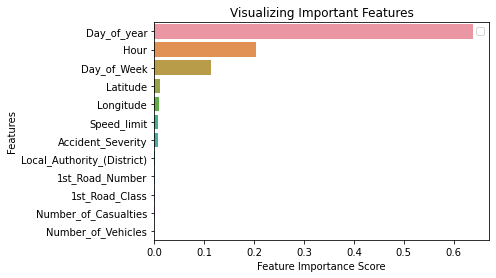

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Learning With Important Features

In [30]:
#Import train_test_split function
from sklearn.model_selection import train_test_split
feature_cols = ['Longitude','Latitude','Day_of_Week','Hour','Day_of_year']
X=pima[feature_cols] #Features

y=pima['Accident']  #Labels


#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4) # 70% training and 30% test

In [31]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=150)

#Train the model using the training sets
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [32]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

#Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))

Accuracy: 0.99984375
Precision: 0.9993690851735015
Recall: 1.0
F1 Score: 0.999684443041969


### Taking User Input

In [13]:
df_userinput = pd.read_csv("userinput.csv")

In [14]:
import time
import datetime
from datetime import date
df_inputdata = pd.DataFrame(columns=['Longitude','Latitude','Day_of_Week','Hour','Day_of_year'])

for index, row in df_userinput.iterrows():
    longitude=row['Longitude']
    latitude=row['Latitude']
    today = date.today()
    today1=datetime.datetime.now()
    dweek = today.weekday()
    nhr = datetime.datetime.today().hour
    nday = (today1 - datetime.datetime(today1.year, 1, 1)).days + 1

    dfnew=pd.DataFrame([[longitude,latitude,dweek,nhr,nday,]],
                   columns=['Longitude','Latitude','Day_of_Week','Hour','Day_of_year',])
    df_inputdata = df_inputdata.append(dfnew,ignore_index=True)
    
df_inputdata.to_csv("inputdata.csv")

In [15]:
pima1 = pd.read_csv("inputdata.csv")

In [16]:
X1=pima1[feature_cols]

In [17]:
import numpy as np
pre = np.array(X1)
X1.head()

,Longitude,Latitude,Day_of_Week,Hour,Day_of_year
0,-0.140579,51.507549,6,0,110
1,-0.073147,51.565363,6,0,110
2,-0.078021,51.528483,6,0,110
3,-0.090889,51.572397,6,0,110
4,-0.090744,51.572395,6,0,110


In [18]:
#ip = pre[:]
probability=pd.DataFrame(model.predict_proba(y_pred))
op = clf.predict_proba(np.array(X1))

In [19]:
probab= op[:,1]
print(probab)

[0.         0.00666667 0.         0.00666667 0.00666667 0.
 0.         0.         0.00666667 0.         0.00666667 0.00666667
 0.        ]


In [20]:

df_inputdata1 = pd.DataFrame(columns=['Longitude','Latitude','Day_of_Week','Hour','Day_of_year'])

for index, row in df_inputdata.iterrows():
    longitude=row['Longitude']
    latitude=row['Latitude']
    dweek=row['Day_of_Week']
    nhr=row['Hour']
    nday=row['Day_of_year']
    
    dfnew=pd.DataFrame([[longitude,latitude,dweek,nhr,nday]],
                       columns=['Longitude','Latitude','Day_of_Week','Hour','Day_of_year',])
    df_inputdata1 = df_inputdata1.append(dfnew,ignore_index=True)
    
df_inputdata1['Probability']=probab
df_inputdata1.to_csv("inputdata.csv")
